In [1]:
import pandas as pd
import numpy as np
import re
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pprint
# plt.figure(figsize=(8,8))


In [2]:
data = pd.read_csv('Sahih Bukhari Without_Tashkel.csv')
data.head()

,Sahih Bukhari Without_Tashkel
0,حدثنا الحميدي عبد الله بن الزبير قال حدثنا سفي...
1,حدثنا عبد الله بن يوسف قال أخبرنا مالك عن هشام...
2,حدثنا يحيى بن بكير قال حدثنا الليث عن عقيل عن ...
3,حدثنا موسى بن إسماعيل قال حدثنا أبو عوانة قال ...
4,حدثنا عبدان قال أخبرنا عبد الله قال أخبرنا يون...


In [3]:
all_hadith = list(data['Sahih Bukhari Without_Tashkel'])

In [4]:
for i in range(10,30):
    print(all_hadith[i])
    print('-'*50)

حدثنا عمرو بن خالد قال حدثنا الليث عن يزيد عن أبي الخير عن عبد الله بن عمرو رضي الله عنهما أن رجلا سأل النبي صلى الله عليه وسلم أي الإسلام خير قال تطعم الطعام وتقرأ السلام على من عرفت ومن لم تعرف.
--------------------------------------------------
حدثنا مسدد قال حدثنا يحيى عن شعبة عن قتادة عن أنس رضي الله عنه عن النبي صلى الله عليه وسلم وعن حسين المعلم قال حدثنا قتادة عن أنس عن النبي صلى الله عليه وسلم قال لا يؤمن أحدكم حتى يحب لأخيه ما يحب لنفسه.
--------------------------------------------------
حدثنا أبو اليمان قال أخبرنا شعيب قال حدثنا أبو الزناد عن الأعرج عن أبي هريرة رضي الله عنه أن رسول الله صلى الله عليه وسلم قال فوالذي نفسي بيده لا يؤمن أحدكم حتى أكون أحب إليه من والده وولده.
--------------------------------------------------
حدثنا يعقوب بن إبراهيم قال حدثنا ابن علية عن عبد العزيز بن صهيب عن أنس عن النبي صلى الله عليه وسلم ح و حدثنا آدم قال حدثنا شعبة عن قتادة عن أنس قال قال النبي صلى الله عليه وسلم لا يؤمن أحدكم حتى أكون أحب إليه من والده وولده والناس أجمعين.
----------------

## Most commen words in hadith "Mode"

In [5]:
all_hadith_split_words = []
for each_h in all_hadith:
    for each_w in each_h.split():
        all_hadith_split_words.append(each_w)
        
temp = collections.Counter(all_hadith_split_words)
collections_of_word = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))
print(f'There are {len(collections_of_word)} unique word.')
print('-'*50)
collections_of_word

There are 33190 unique word.
--------------------------------------------------


{'الله': 29360,
 'عن': 18855,
 'بن': 16977,
 'قال': 16563,
 'حدثنا': 14339,
 'عليه': 11840,
 'صلى': 11197,
 'وسلم': 10645,
 'من': 7541,
 'عبد': 6165,
 'رسول': 5811,
 'النبي': 5625,
 'أن': 5573,
 'أبي': 5528,
 'في': 5175,
 'فقال': 4699,
 'رضي': 4127,
 'ابن': 4054,
 'ثم': 3380,
 'على': 3354,
 'ما': 3169,
 'أبو': 3025,
 'لا': 2876,
 'إلى': 2408,
 'عنه': 2367,
 'محمد': 2251,
 'حتى': 2195,
 'يا': 2124,
 'حدثني': 2119,
 'كان': 2028,
 'أخبرنا': 2008,
 'عمر': 1978,
 'إن': 1676,
 'له': 1644,
 'سمعت': 1539,
 'إلا': 1534,
 'أو': 1532,
 'سعيد': 1526,
 'مالك': 1396,
 'ولا': 1381,
 'يقول': 1377,
 'قالت': 1312,
 'عنهما': 1262,
 'عائشة': 1253,
 'هريرة': 1247,
 'علي': 1205,
 'يحيى': 1176,
 'هذا': 1165,
 'إذا': 1144,
 'وقال': 1127,
 '{': 1115,
 'ذلك': 1098,
 'أنه': 1069,
 'أنس': 1062,
 'الناس': 1050,
 'إبراهيم': 1035,
 'عباس': 1016,
 'موسى': 1005,
 'الرحمن': 990,
 'سفيان': 975,
 'لم': 975,
 'بكر': 957,
 'به': 952,
 'عمرو': 944,
 'يوم': 941,
 'أبا': 931,
 'قلت': 930,
 'شعبة': 916,
 '}': 911,
 'أبيه': 904

In [6]:
keys =  [k for k in collections_of_word.keys()]
values = [v for v in collections_of_word.values()]

## How many عن in each hadith?


In [7]:
splitting_words= ['عن' , 'حدثنا', 'سمعت']

25 0


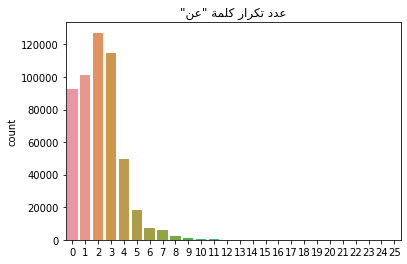

In [8]:
count = []
wordcount = 0
my_word="عن"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "عن"'))
plt.title(Ar_title);        

9 0


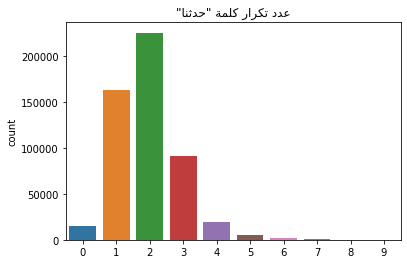

In [9]:
count = []
wordcount = 0
my_word="حدثنا"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "حدثنا"'))
plt.title(Ar_title);

6 0


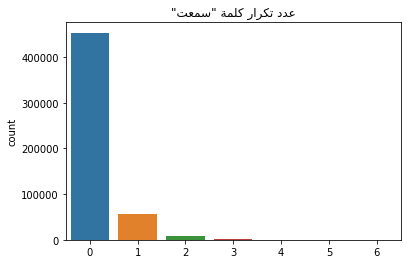

In [10]:
count = []
wordcount = 0
my_word="سمعت"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "سمعت"'))
plt.title(Ar_title);

### Number of each word occurred in each hadith ['عن' , 'حدثنا', 'سمعت']

In [11]:
count = []
my_word_1="عن"
my_word_2="حدثنا"
my_word_3="سمعت"
for i in range(len(all_hadith)):
    wordcount_1, wordcount_2, wordcount_3 = 0, 0 ,0, 
    for word in all_hadith[i].split():
        if(my_word_1 == word):
            wordcount_1 +=1
        elif(my_word_2 == word):
            wordcount_2 +=1
        elif(my_word_3 == word):
            wordcount_3 +=1
    count.append({"Hadith_num": i, "An": wordcount_1, "Hadathna": wordcount_2, "Samaat": wordcount_3}) 
count # ['عن , حدثنا , سمعنا']


[{'Hadith_num': 0, 'An': 0, 'Hadathna': 3, 'Samaat': 2},
 {'Hadith_num': 1, 'An': 3, 'Hadathna': 1, 'Samaat': 0},
 {'Hadith_num': 2, 'An': 6, 'Hadathna': 2, 'Samaat': 1},
 {'Hadith_num': 3, 'An': 1, 'Hadathna': 4, 'Samaat': 0},
 {'Hadith_num': 4, 'An': 3, 'Hadathna': 2, 'Samaat': 0},
 {'Hadith_num': 5, 'An': 8, 'Hadathna': 1, 'Samaat': 0},
 {'Hadith_num': 6, 'An': 2, 'Hadathna': 1, 'Samaat': 0},
 {'Hadith_num': 7, 'An': 4, 'Hadathna': 3, 'Samaat': 0},
 {'Hadith_num': 8, 'An': 10, 'Hadathna': 3, 'Samaat': 1},
 {'Hadith_num': 9, 'An': 2, 'Hadathna': 3, 'Samaat': 0},
 {'Hadith_num': 10, 'An': 3, 'Hadathna': 2, 'Samaat': 0},
 {'Hadith_num': 11, 'An': 6, 'Hadathna': 3, 'Samaat': 0},
 {'Hadith_num': 12, 'An': 2, 'Hadathna': 2, 'Samaat': 0},
 {'Hadith_num': 13, 'An': 5, 'Hadathna': 4, 'Samaat': 0},
 {'Hadith_num': 14, 'An': 3, 'Hadathna': 3, 'Samaat': 0},
 {'Hadith_num': 15, 'An': 1, 'Hadathna': 2, 'Samaat': 1},
 {'Hadith_num': 16, 'An': 1, 'Hadathna': 1, 'Samaat': 0},
 {'Hadith_num': 17, 'An

### Some inshights!
* Most of Hadiths has a lot of عن, and some of the just حدثنا , and some mixed of حدثنا and عن , so:
    * if there is at least on "عن", split from after it till the end.
    * else, there will be at least one of حدثنا split after it till the end.


### Ther are differance between in `ي ى`
* "رسول الله صلي الله عليه وسلم"
* "رسول الله صلى الله عليه وسلم"

-----
* "النبي صلى الله عليه وسلم"
* "النبي صلى الله عليه وسلم"

* "رسول الله صلى الله عليه وسلم"

So we need to normalize **صلي** with **صلى**  


In [13]:
# print(f"The word صلى occurred {collections_of_word['صلى']} times")
# print(f"The word صلي occurred {collections_of_word['صلي']} times")
# print(f"The word النبي occurred {collections_of_word['النبي']} times")
# # print(f"The word النبى occurred {collections_of_word['النبى']} times") # geive me exciption if remove the comment
      
# try:
#     n = collections_of_word['النبى']
# except Exception:
#     print(f"The word النبى occurred {n} times")
      
      
# print(f"all summation of صلى and صلي is = {collections_of_word['صلى'] + collections_of_word['صلي']}")
# print(f"all summation of النبي and النبى is = {collections_of_word['النبي'] + n}")

In [14]:
def normalize(sentence):
    """
        replace all  صلي or النبي with صلى or النبى
    """
    sentence = re.sub("صلي", "صلى", sentence)
    sentence = re.sub("النبي", "النبى", sentence)
    return sentence

test_st = "قال رسول الله صلي الله عليه وسلم ، قال النبي صلى الله عليه وسلم"
print(test_st)
print(normalize(test_st))

قال رسول الله صلي الله عليه وسلم ، قال النبي صلى الله عليه وسلم
قال رسول الله صلى الله عليه وسلم ، قال النبى صلى الله عليه وسلم


In [15]:
all_hadith_with_normalization = []
for hadith in all_hadith:
    all_hadith_with_normalization.append(normalize(hadith)) 


In [16]:
all_hadith_split_words_normalized = []
for each_h in all_hadith_with_normalization:
    for each_w in each_h.split():
        all_hadith_split_words_normalized.append(each_w)
        
temp = collections.Counter(all_hadith_split_words_normalized)
collections_of_word_normalized = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))

print("\t***The Same Length Here***\t")
print(f"all summation of صلى is = {collections_of_word_normalized['صلى'] }")
print(f"all summation of النبى is = {collections_of_word_normalized['النبى'] }")

	***The Same Length Here***	
all summation of صلى is = 11200
all summation of النبى is = 5625


In [17]:
# just for testing code

a = "رضي الله عنهما و رضي الله عنه سمعت عن فلا عن فلان قال"

all_matches = [(m.group(0), (m.start(), m.end()-1)) for m in re.finditer('عن', a)]
print(all_matches)
last_matche , last_indecies= zip(*all_matches)
first_index, last_index = last_indecies[-1][0], last_indecies[-1][1]
sanad = a[0:first_index]
matn = a[last_index+1:]

print(sanad)
print(matn)

[('عن', (9, 10)), ('عن', (26, 27)), ('عن', (35, 36)), ('عن', (42, 43))]
رضي الله عنهما و رضي الله عنه سمعت عن فلا 
 فلان قال


### Here we have 690 not contain the ideicator of splited words!

searching_word_1 = " رسول الله "

searching_word_2 = " النبى "


In [18]:
"""
    Here get all not work well hadith
"""

test_hadith = all_hadith_with_normalization
splited_hadiths = []
searching_word_1 = " رسول الله "
searching_word_2 = " النبى "
padding_word =" صلى الله عليه وسلم "
f1, f2 = 0 , 0
n_not = 0
hadith_not_work_well = []
for i, hadith in enumerate(test_hadith):
    st = ""
    st_1 = re.search(searching_word_1, hadith)
    st_2 = re.search(searching_word_2, hadith)
    if st_1 == None and st_2 == None:
        n_not +=1
        hadith_not_work_well.append(hadith)

print(n_not)    


690


In [19]:
for i in range(10):
    print(hadith_not_work_well[i])
    print('-'*50)

حدثنا إبراهيم بن حمزة قال حدثنا إبراهيم بن سعد عن صالح عن ابن شهاب عن عبيد الله بن عبد الله أن عبد الله بن عباس أخبره قال أخبرني أبو سفيان بن حرب أن هرقل قال له سألتك هل يزيدون أم ينقصون فزعمت أنهم يزيدون وكذلك الإيمان حتى يتم وسألتك هل يرتد أحد سخطة لدينه بعد أن يدخل فيه فزعمت أن لا وكذلك الإيمان حين تخالط بشاشته القلوب لا يسخطه أحد.
--------------------------------------------------
حدثنا إسماعيل بن أبي أويس قال حدثني مالك عن ابن شهاب عن عبيد الله بن عبد الله بن عتبة عن عبد الله بن عباس قال أقبلت راكبا على حمار أتان وأنا يومئذ قد ناهزت الاحتلام ورسول الله صلى الله عليه وسلم يصلى بمنى إلى غير جدار فمررت بين يدي بعض الصف وأرسلت الأتان ترتع فدخلت في الصف فلم ينكر ذلك علي.
--------------------------------------------------
حدثنا محمد بن سلام قال أخبرنا وكيع عن سفيان عن مطرف عن الشعبي عن أبي جحيفة قال قلت لعلي بن أبي طالب هل عندكم كتاب قال لا إلا كتاب الله أو فهم أعطيه رجل مسلم أو ما في هذه الصحيفة قال قلت فما في هذه الصحيفة قال العقل وفكاك الأسير ولا يقتل مسلم بكافر.
--------------------

In [20]:
def splilt_hadith_book(data):
    """
        I will check if the hadith contain the exact search words
        if it conain:
            split it
        else:
            put whole hadith in sanad and matn
    """
    splited_hadiths = []
    searching_word_1 = " رسول الله "
    searching_word_2 = " النبى "
    padding_word =" صلى الله عليه وسلم "
    f1, f2 = 0 , 0
    n_not = 0

    for i, hadith in enumerate(data):
        st = ""
        st_1 = re.search(searching_word_1, hadith)
        st_2 = re.search(searching_word_2, hadith)
        # if hadith didn't containt specific spliting word/s
        if st_1 == None and st_2 == None:
            n_not +=1
            splited_hadiths.append({"sanad" : hadith,
                               "matn": hadith})
            continue

         # take the not None
        if st_1 == None:
            st = st_2 
            f2 = 1
        else:
            st = st_1
            f1 = 1
        sanad = hadith[ : st.start()] + (searching_word_2 if f2 else searching_word_1)  + padding_word

        matn = hadith[st.end()-1 + len(padding_word) : ]

        splited_hadiths.append({"sanad" : sanad,
                               "matn": matn})
    return splited_hadiths


In [23]:
splited_hadiths = splilt_hadith_book(all_hadith_with_normalization)
splited_hadiths

[{'sanad': 'حدثنا الحميدي عبد الله بن الزبير قال حدثنا سفيان قال حدثنا يحيى بن سعيد الأنصاري قال أخبرني محمد بن إبراهيم التيمي أنه سمع علقمة بن وقاص الليثي يقول سمعت عمر بن الخطاب رضي الله عنه على المنبر قال سمعت رسول الله  صلى الله عليه وسلم ',
  'matn': 'يقول إنما الأعمال بالنيات وإنما لكل امرئ ما نوى فمن كانت هجرته إلى دنيا يصيبها أو إلى امرأة ينكحها فهجرته إلى ما هاجر إليه.'},
 {'sanad': 'حدثنا عبد الله بن يوسف قال أخبرنا مالك عن هشام بن عروة عن أبيه عن عائشة أم المؤمنين رضي الله عنها أن الحارث بن هشام رضي الله عنه سأل رسول الله  صلى الله عليه وسلم ',
  'matn': 'فقال يا رسول الله كيف يأتيك الوحي فقال رسول الله صلى الله عليه وسلم أحيانا يأتيني مثل صلصلة الجرس وهو أشده علي فيفصم عني وقد وعيت عنه ما قال وأحيانا يتمثل لي الملك رجلا فيكلمني فأعي ما يقول قالت عائشة رضي الله عنها ولقد رأيته ينزل عليه الوحي في اليوم الشديد البرد فيفصم عنه وإن جبينه ليتفصد عرقا.'},
 {'sanad': 'حدثنا يحيى بن بكير قال حدثنا الليث عن عقيل عن ابن شهاب عن عروة بن الزبير عن عائشة أم المؤمنين أنها قالت أول ما بدئ 

In [28]:
print(f"The percentage of good work {round((len(splited_hadiths) - n_not)/ len(splited_hadiths),2) * 100}%")

The percentage of good work 90.0%
